In [2]:
import pandas as pd
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

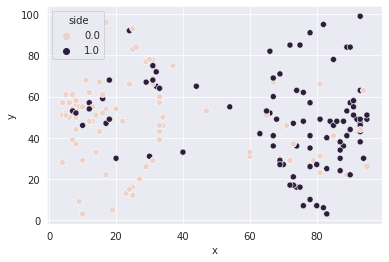

In [52]:
from datetime import datetime
from LBA_scraper import LBAScraper
import json
import os
from requests.adapters import HTTPAdapter
from urllib3 import Retry
import requests


def get_actions(self):
    game = self.current_game
    url = f'https://www.legabasket.it/match/{game["game_id"]}/pbp'
    actions = []

    session = requests.Session()
    retry = Retry(connect=10, backoff_factor=2)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)

    period = 1
    period_url = os.path.join(url, str(period))
    try:
        response = session.get(period_url).json()
    except json.decoder.JSONDecodeError:
        print(period_url)
        exit()
    while response['data']['pbp'] is not None and response['data']['pbp']:
        actions += response['data']['pbp']
        period += 1
        period_url = os.path.join(url, str(period))
        try:
            response = session.get(period_url).json()
        except json.decoder.JSONDecodeError:
            continue

    return actions

scraper = LBAScraper(None)

scraper.current_game = {
    'game_id': 23682,
    'data_set': '2021-2022 Playoffs',
    'date': datetime(2022, 5, 27)
}

actions = scraper.get_actions()

df = pd.DataFrame(actions)

sns.scatterplot(x=df['x'], y=df['y'], hue=df['side'])


<AxesSubplot:xlabel='converted_x', ylabel='converted_y'>

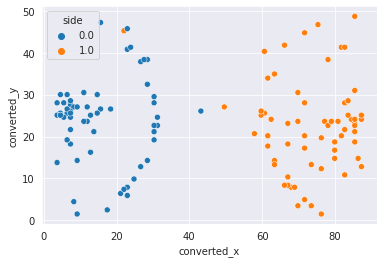

In [53]:
df = pd.read_csv('output.csv')

df['dist'] = df['shot_distance'] > 28

df = df[df.event_type.isin(['miss', 'shot'])]

sns.scatterplot(x=df['converted_x'], y=df['converted_y'], hue=df['side'])